In [1]:
import optuna

ModuleNotFoundError: No module named 'optuna'

In [2]:
pip install optuna


                                              0.0/409.6 kB ? eta -:--:--
     ----------------------                 245.8/409.6 kB 5.0 MB/s eta 0:00:01
     -------------------------------------- 409.6/409.6 kB 4.2 MB/s eta 0:00:00
                                              0.0/226.0 kB ? eta -:--:--
     -------------------------------------  225.3/226.0 kB 6.9 MB/s eta 0:00:01
     -------------------------------------- 226.0/226.0 kB 4.6 MB/s eta 0:00:00
                                              0.0/78.7 kB ? eta -:--:--
     ---------------------------------------- 78.7/78.7 kB 4.3 MB/s eta 0:00:00


In [3]:
import optuna
import xgboost as xgb

ModuleNotFoundError: No module named 'xgboost'

In [4]:
pip install xgboost

                                              0.0/99.7 MB ? eta -:--:--
                                              0.2/99.7 MB 7.0 MB/s eta 0:00:15
                                              0.5/99.7 MB 5.6 MB/s eta 0:00:18
                                              0.6/99.7 MB 5.0 MB/s eta 0:00:20
                                              0.8/99.7 MB 5.2 MB/s eta 0:00:19
                                              1.0/99.7 MB 5.1 MB/s eta 0:00:20
                                              1.3/99.7 MB 5.1 MB/s eta 0:00:20
                                              1.5/99.7 MB 4.9 MB/s eta 0:00:21
                                              1.7/99.7 MB 4.8 MB/s eta 0:00:21
                                              1.8/99.7 MB 4.7 MB/s eta 0:00:22
                                              1.9/99.7 MB 4.6 MB/s eta 0:00:22
                                              2.1/99.7 MB 4.4 MB/s eta 0:00:23
                                              2.4/99.7 MB 4

In [8]:
import optuna
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [9]:
import numpy as np
import pandas as pd

In [10]:
df = pd.read_csv("Admission_Prediction.csv")

In [11]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [13]:
df.describe().info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         8 non-null      float64
 1   GRE Score          8 non-null      float64
 2   TOEFL Score        8 non-null      float64
 3   University Rating  8 non-null      float64
 4   SOP                8 non-null      float64
 5   LOR                8 non-null      float64
 6   CGPA               8 non-null      float64
 7   Research           8 non-null      float64
 8   Chance of Admit    8 non-null      float64
dtypes: float64(9)
memory usage: 640.0+ bytes


In [14]:
df.isnull().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [17]:
df.duplicated().sum()

0

In [19]:
df['GRE Score'] = df['GRE Score'].fillna(df['GRE Score'].mean())
df['TOEFL Score'] = df['TOEFL Score'].fillna(df['TOEFL Score'].mean())
df['University Rating'] = df['University Rating'].fillna(df['University Rating'].mean())

In [20]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

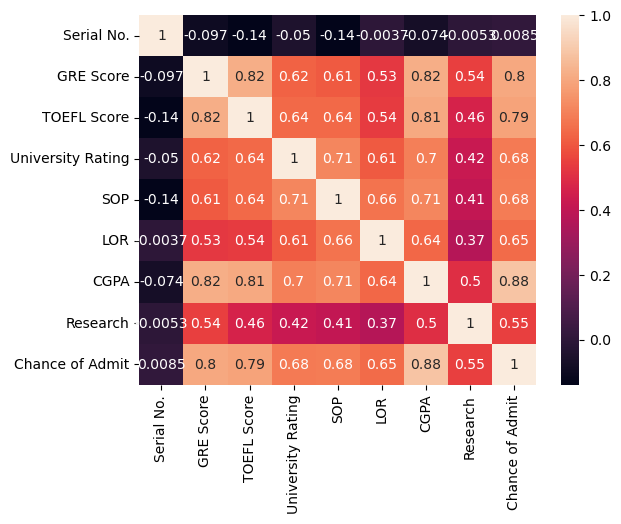

In [22]:
sns.heatmap(df.corr(),annot=True)

In [25]:
df.drop('Serial No.',axis=1,inplace=True)

In [26]:
columns = df.columns

In [27]:
columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

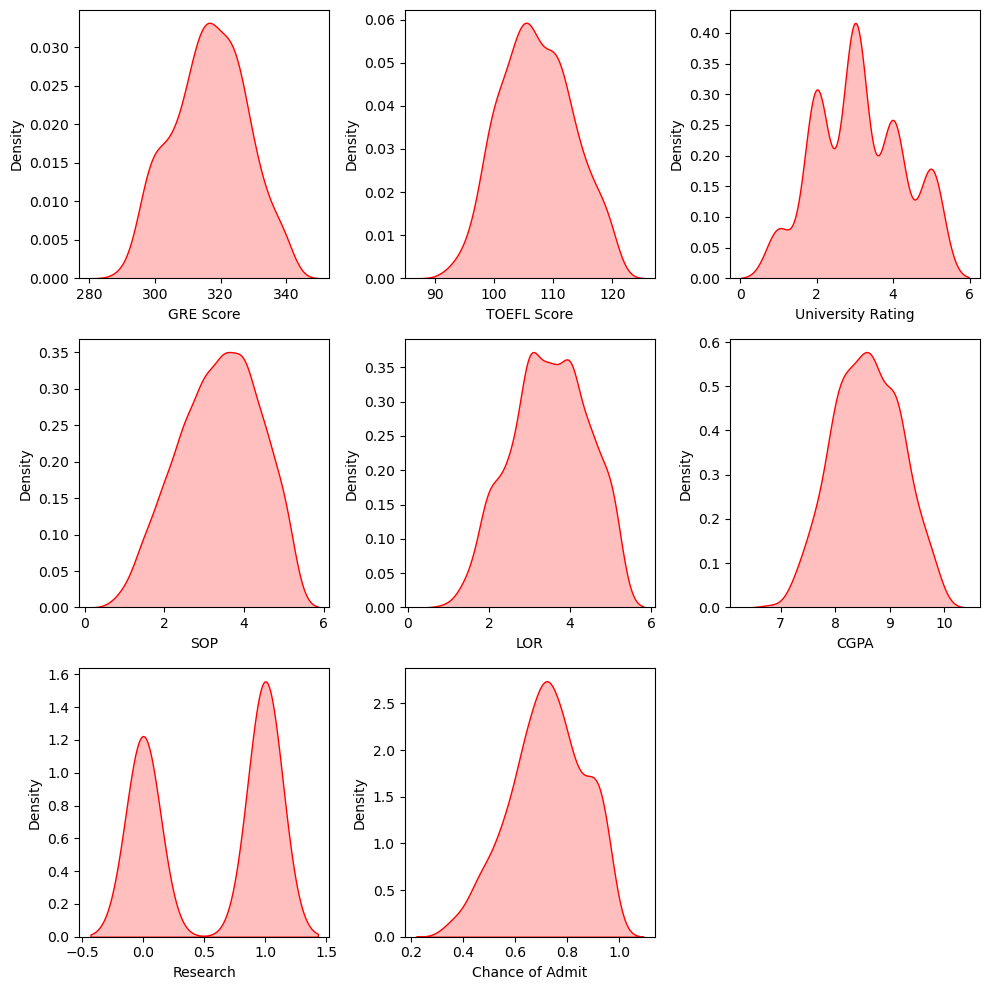

In [30]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(10,10))
for i in range(len(columns)):
    plt.subplot(3,3,i+1)
    sns.kdeplot(df[columns[i]],shade=True,color='red')
    plt.tight_layout()
plt.show()

<Axes: >

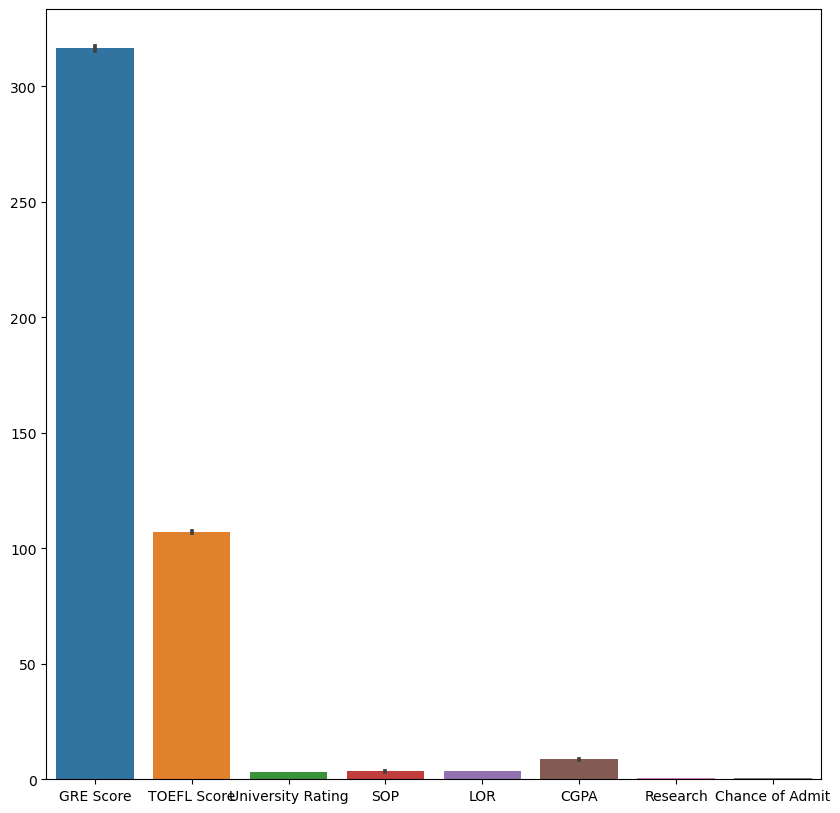

In [36]:
plt.figure(figsize=(10,10))
sns.barplot(df)

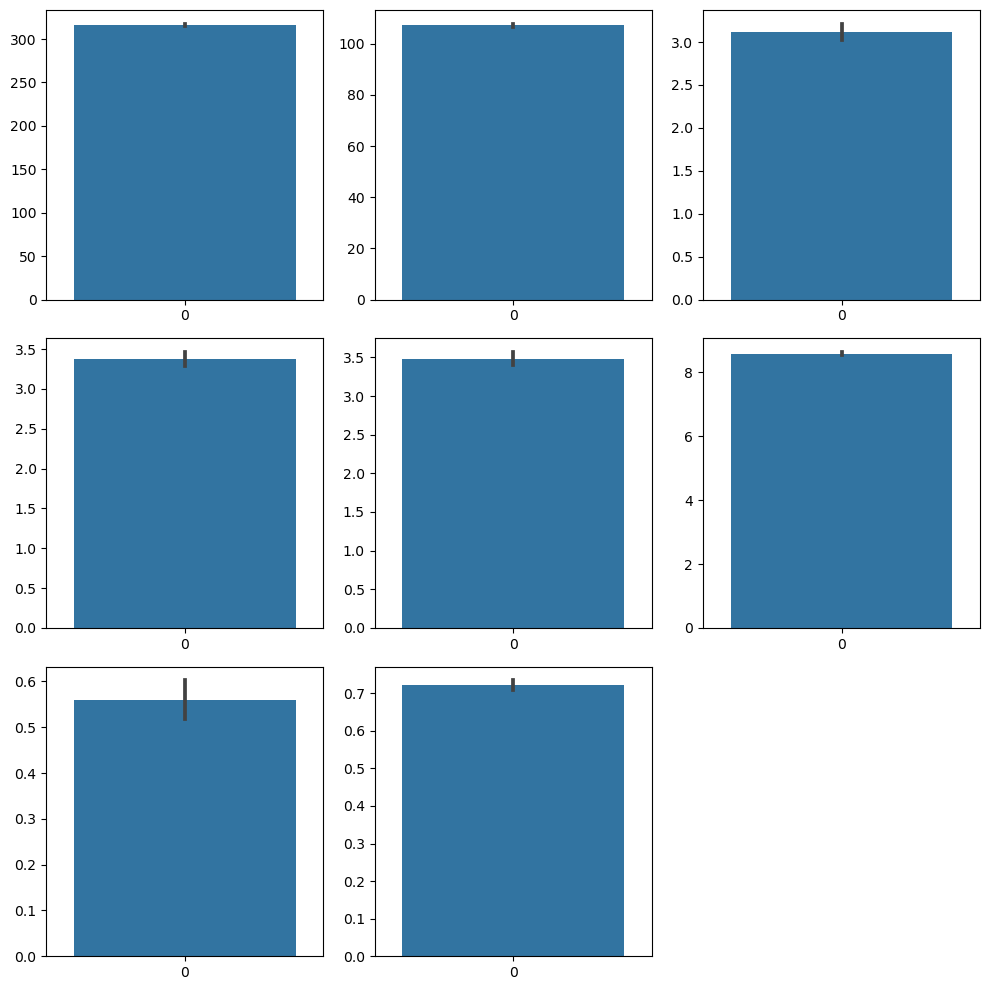

In [35]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(10,10))
for i in range(len(columns)):
    plt.subplot(3,3,i+1)
    sns.barplot(df[columns[i]])
    plt.tight_layout()
plt.show()

<Axes: ylabel='Count'>

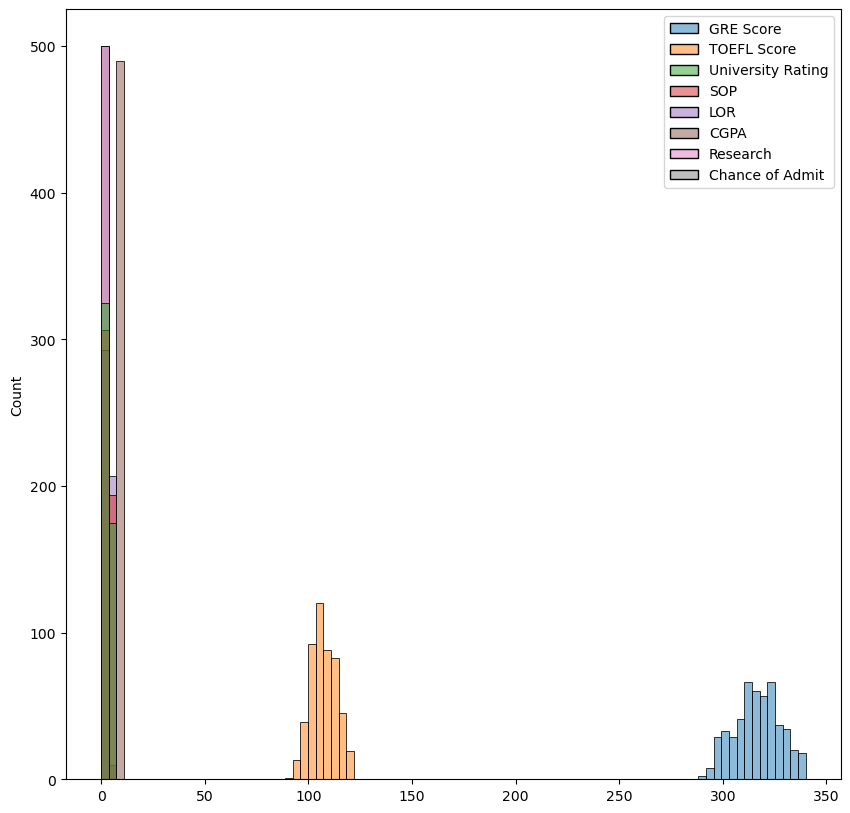

In [37]:
plt.figure(figsize=(10,10))
sns.histplot(df)

<Axes: >

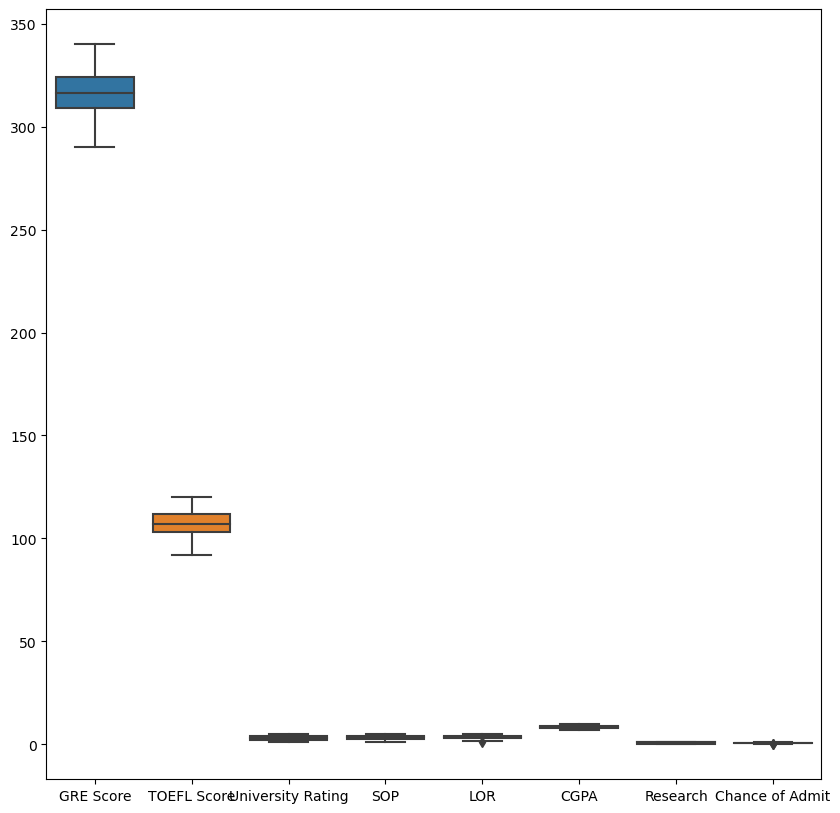

In [43]:
plt.figure(figsize=(10,10))
sns.boxplot(df)

In [46]:
 X=df.drop('Chance of Admit',axis=1)

In [47]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.000000,118.0,4.0,4.5,4.5,9.65,1
1,324.000000,107.0,4.0,4.0,4.5,8.87,1
2,316.558763,104.0,3.0,3.0,3.5,8.00,1
3,322.000000,110.0,3.0,3.5,2.5,8.67,1
4,314.000000,103.0,2.0,2.0,3.0,8.21,0


In [48]:
y = df["Chance of Admit"]

In [49]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [52]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=34)

In [54]:
X_train.shape, X_test.shape

((375, 7), (125, 7))

In [55]:
y_train.shape, y_test.shape

((375,), (125,))

In [56]:
scaler = StandardScaler()

In [57]:
X_train = scaler.fit_transform(X_train)

In [58]:
X_test = scaler.transform(X_test)

In [59]:
X_train.shape, X_test.shape

((375, 7), (125, 7))

In [60]:
!nvidia-smi

Sat Oct 21 08:49:35 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 532.09                 Driver Version: 532.09       CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                      TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce MX330          WDDM | 00000000:01:00.0 Off |                  N/A |
| N/A   48C    P0               N/A /  N/A|      0MiB /  2048MiB |      2%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [84]:
def objective(trial, data=X, target=y):
    X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=34)
    params={
        'tree_method':'gpu_hist',
        'reg_lambda':trial.suggest_loguniform('learning_rate',0.005,0.5),
        'alpha':trial.suggest_loguniform('learning_rate',0.005,0.5),
        'colsample_bytree':trial.suggest_categorical('colsample_bytree',[.1,.2,.3,.4,.5,.6,.7,.8,.9,1]),
        'subsample':trial.suggest_categorical('subsample',[.1,.2,.3,.4,.5,.6,.7,.8,.9,1]),
        'learning_rate':trial.suggest_loguniform('learning_rate',[0.00001,.0003,.0005,.0008,.003,.005,.008,.03,.05,.08,.1,.5,.9,2,5,7,8]),
        'n_estimators':3000,
        'max_depth':trial.suggest_categorical('max_depth',[2,3,4,5,6,7,8,9,10,12,15]),
        'random_state':trial.suggest_categorical('random_state'[10,20,30,54,66,78,90,121,152]),
        'min_child_weight':trial.suggest_int('min_child_weight',1,300)
        }
    xgb_reg_model =xgb.XGBregressor(**params)
    xgb_reg_model.fit(X_train,y_train)
    xgb_pred = xgb_reg_model.predict(X_test)
    mse = mean_squared_error(y_test,xgb_pred)
    return mse
    

In [85]:
study = optuna.create_study()
study.optimize(objective,n_trials=10)
study.best_trial.params

[I 2023-10-21 10:45:11,149] A new study created in memory with name: no-name-24503b5b-3be1-41d6-890f-c0857698261e
[W 2023-10-21 10:45:11,159] Trial 0 failed with parameters: {'learning_rate': 0.012187544703856544, 'colsample_bytree': 0.6, 'subsample': 0.1} because of the following error: TypeError("Trial.suggest_loguniform() missing 1 required positional argument: 'high'").
Traceback (most recent call last):
  File "C:\Users\Ranga Pavan\anaconda3\Lib\site-packages\optuna\study\_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "C:\conda_tmp\ipykernel_25876\2035143255.py", line 9, in objective
    'learning_rate':trial.suggest_loguniform('learning_rate',[0.00001,.0003,.0005,.0008,.003,.005,.008,.03,.05,.08,.1,.5,.9,2,5,7,8]),
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Ranga Pavan\anaconda3\Lib\site-packages\optuna\_dep

TypeError: Trial.suggest_loguniform() missing 1 required positional argument: 'high'

In [83]:
study.Dataframe_history()

AttributeError: 'Study' object has no attribute 'Dataframe_history'